In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read dataset
file_path = "E:/Uni/Thesis/Material/Dataset/archive/world_development_data_imputed.csv"
data = pd.read_csv(file_path, sep=',')

# Explore the data
print(data.head(5))
print(data.isna().sum())

     Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

       GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
0  1.778669e+10    41.312634      17.178

In [5]:
# Preprocess data
Oceania_data = data[data['Region'] == 'Oceania']
Oceania_data = Oceania_data.drop(columns=['Year', 'SurfAreaSqKm'])

Oceania_data = Oceania_data.select_dtypes(include=[np.number])

# Explore data
print(Oceania_data.head(5))
print(Oceania_data.isna().sum())


      PopTotal     PopDens  PopGrowth%           GDP  GDPGrowth%  \
3      54224.0  301.244444    0.721838  1.153475e+08    1.354079   
7     111709.0  159.584286    0.152297  2.332718e+08    4.833904   
18     10377.0  518.850000   -0.057803  6.765300e+07   -3.583406   
47  19028802.0    2.476967    1.144473  4.158450e+11    3.901171   
50    184008.0   65.020495    0.981388  2.588561e+08    5.093045   

    AdolFertRate  AgriValAdd%GDP  Exports%GDP  FertRate     FDINetBoP  ...  \
3         99.344        8.014391    28.696331     4.592  7.390000e+05  ...   
7         65.191       24.075049    17.971096     4.279  3.036791e+09  ...   
18        80.154       23.510799    67.597804     3.642  1.335278e+06  ...   
47        17.357        3.112843    19.405280     1.756  1.489298e+10  ...   
50        43.989       15.076355    61.633928     4.514 -1.206806e+06  ...   

        GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
3   1.500075e+08   100.812761      12.681072 

PopGrowth%         1.000000
UrbanPopGrowth%    0.850697
IndValAdd%GDP      0.372477
PopTotal           0.236500
FertRate           0.220828
NetMigr            0.217712
AgriValAdd%GDP     0.213346
MortRateU5         0.192945
AdolFertRate       0.169655
InflConsPric%      0.129983
GDP                0.104239
GNIAtlas           0.103607
FDINetBoP          0.097381
GDPGrowth%         0.085039
LifeExpBirth       0.057023
GNI/CapAtlas       0.030661
MobileSubs/100    -0.083893
MerchTrade%GDP    -0.126444
Exports%GDP       -0.161119
Imports%GDP       -0.293425
PopDens           -0.328935
Name: PopGrowth%, dtype: float64


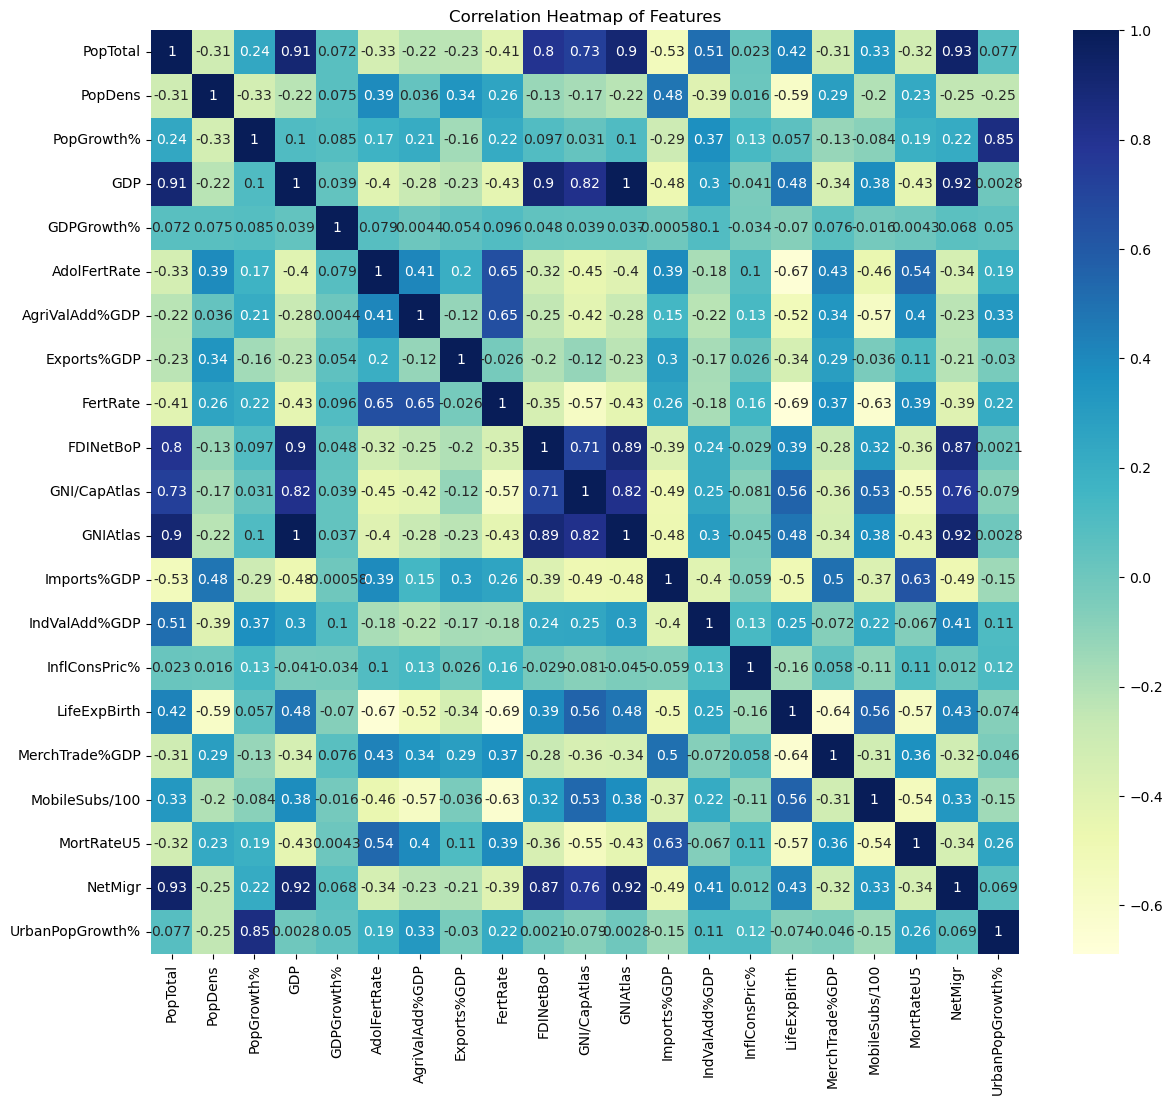

In [6]:
# Compute correlation matrix
Oceania_data_corr = Oceania_data.corr()
print(Oceania_data_corr['PopGrowth%'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(Oceania_data_corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Features")
plt.savefig("Featurs_Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

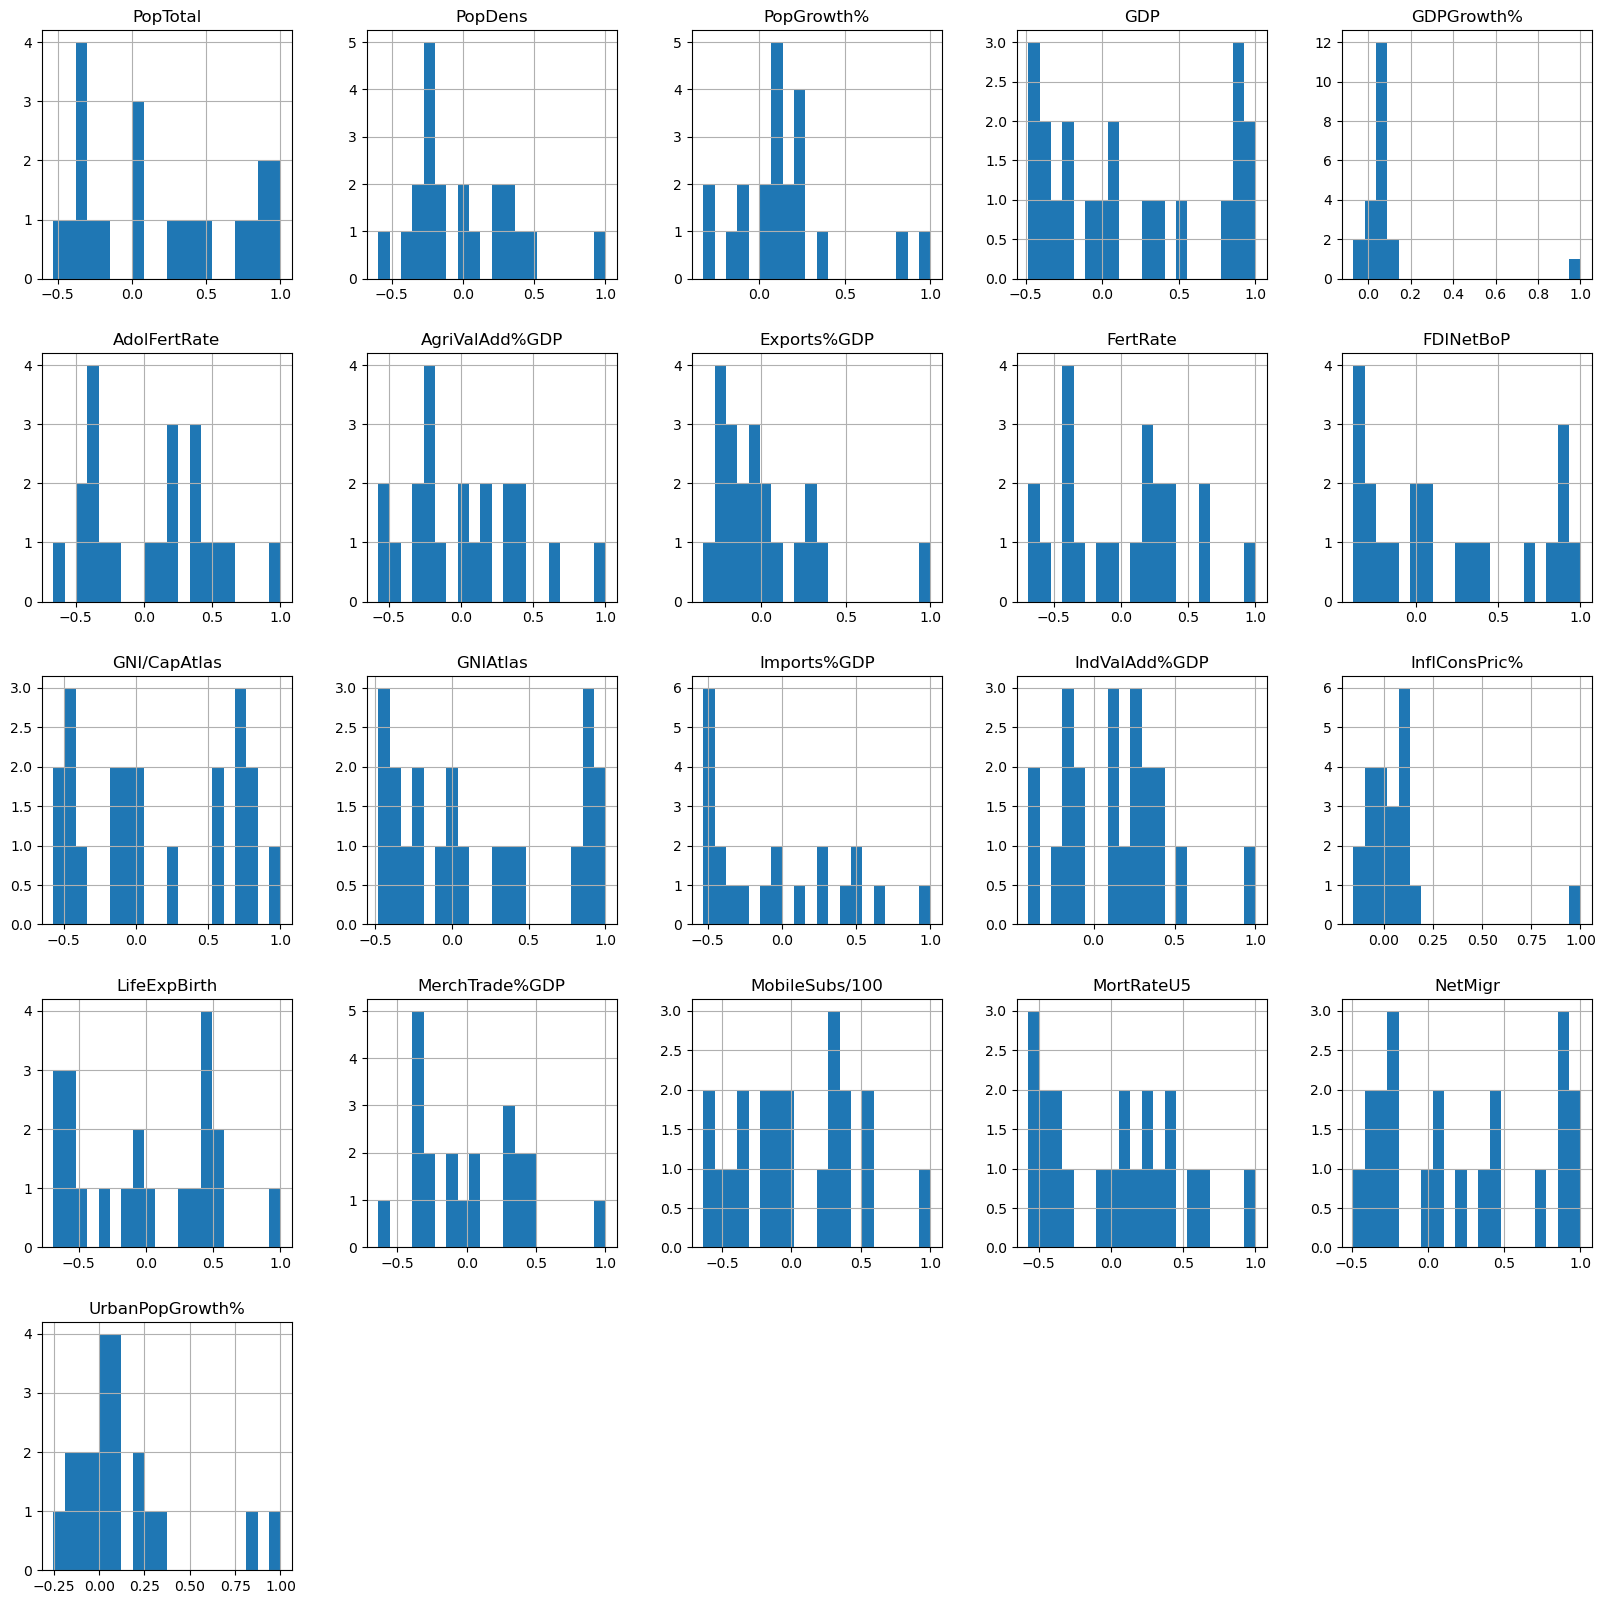

In [7]:
# Plot histograms
Oceania_data_corr.hist(figsize=(20, 20), bins=20)
plt.title("Features Histograms")
plt.savefig("Features_His.png")
plt.show()

C:\Users\nazno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


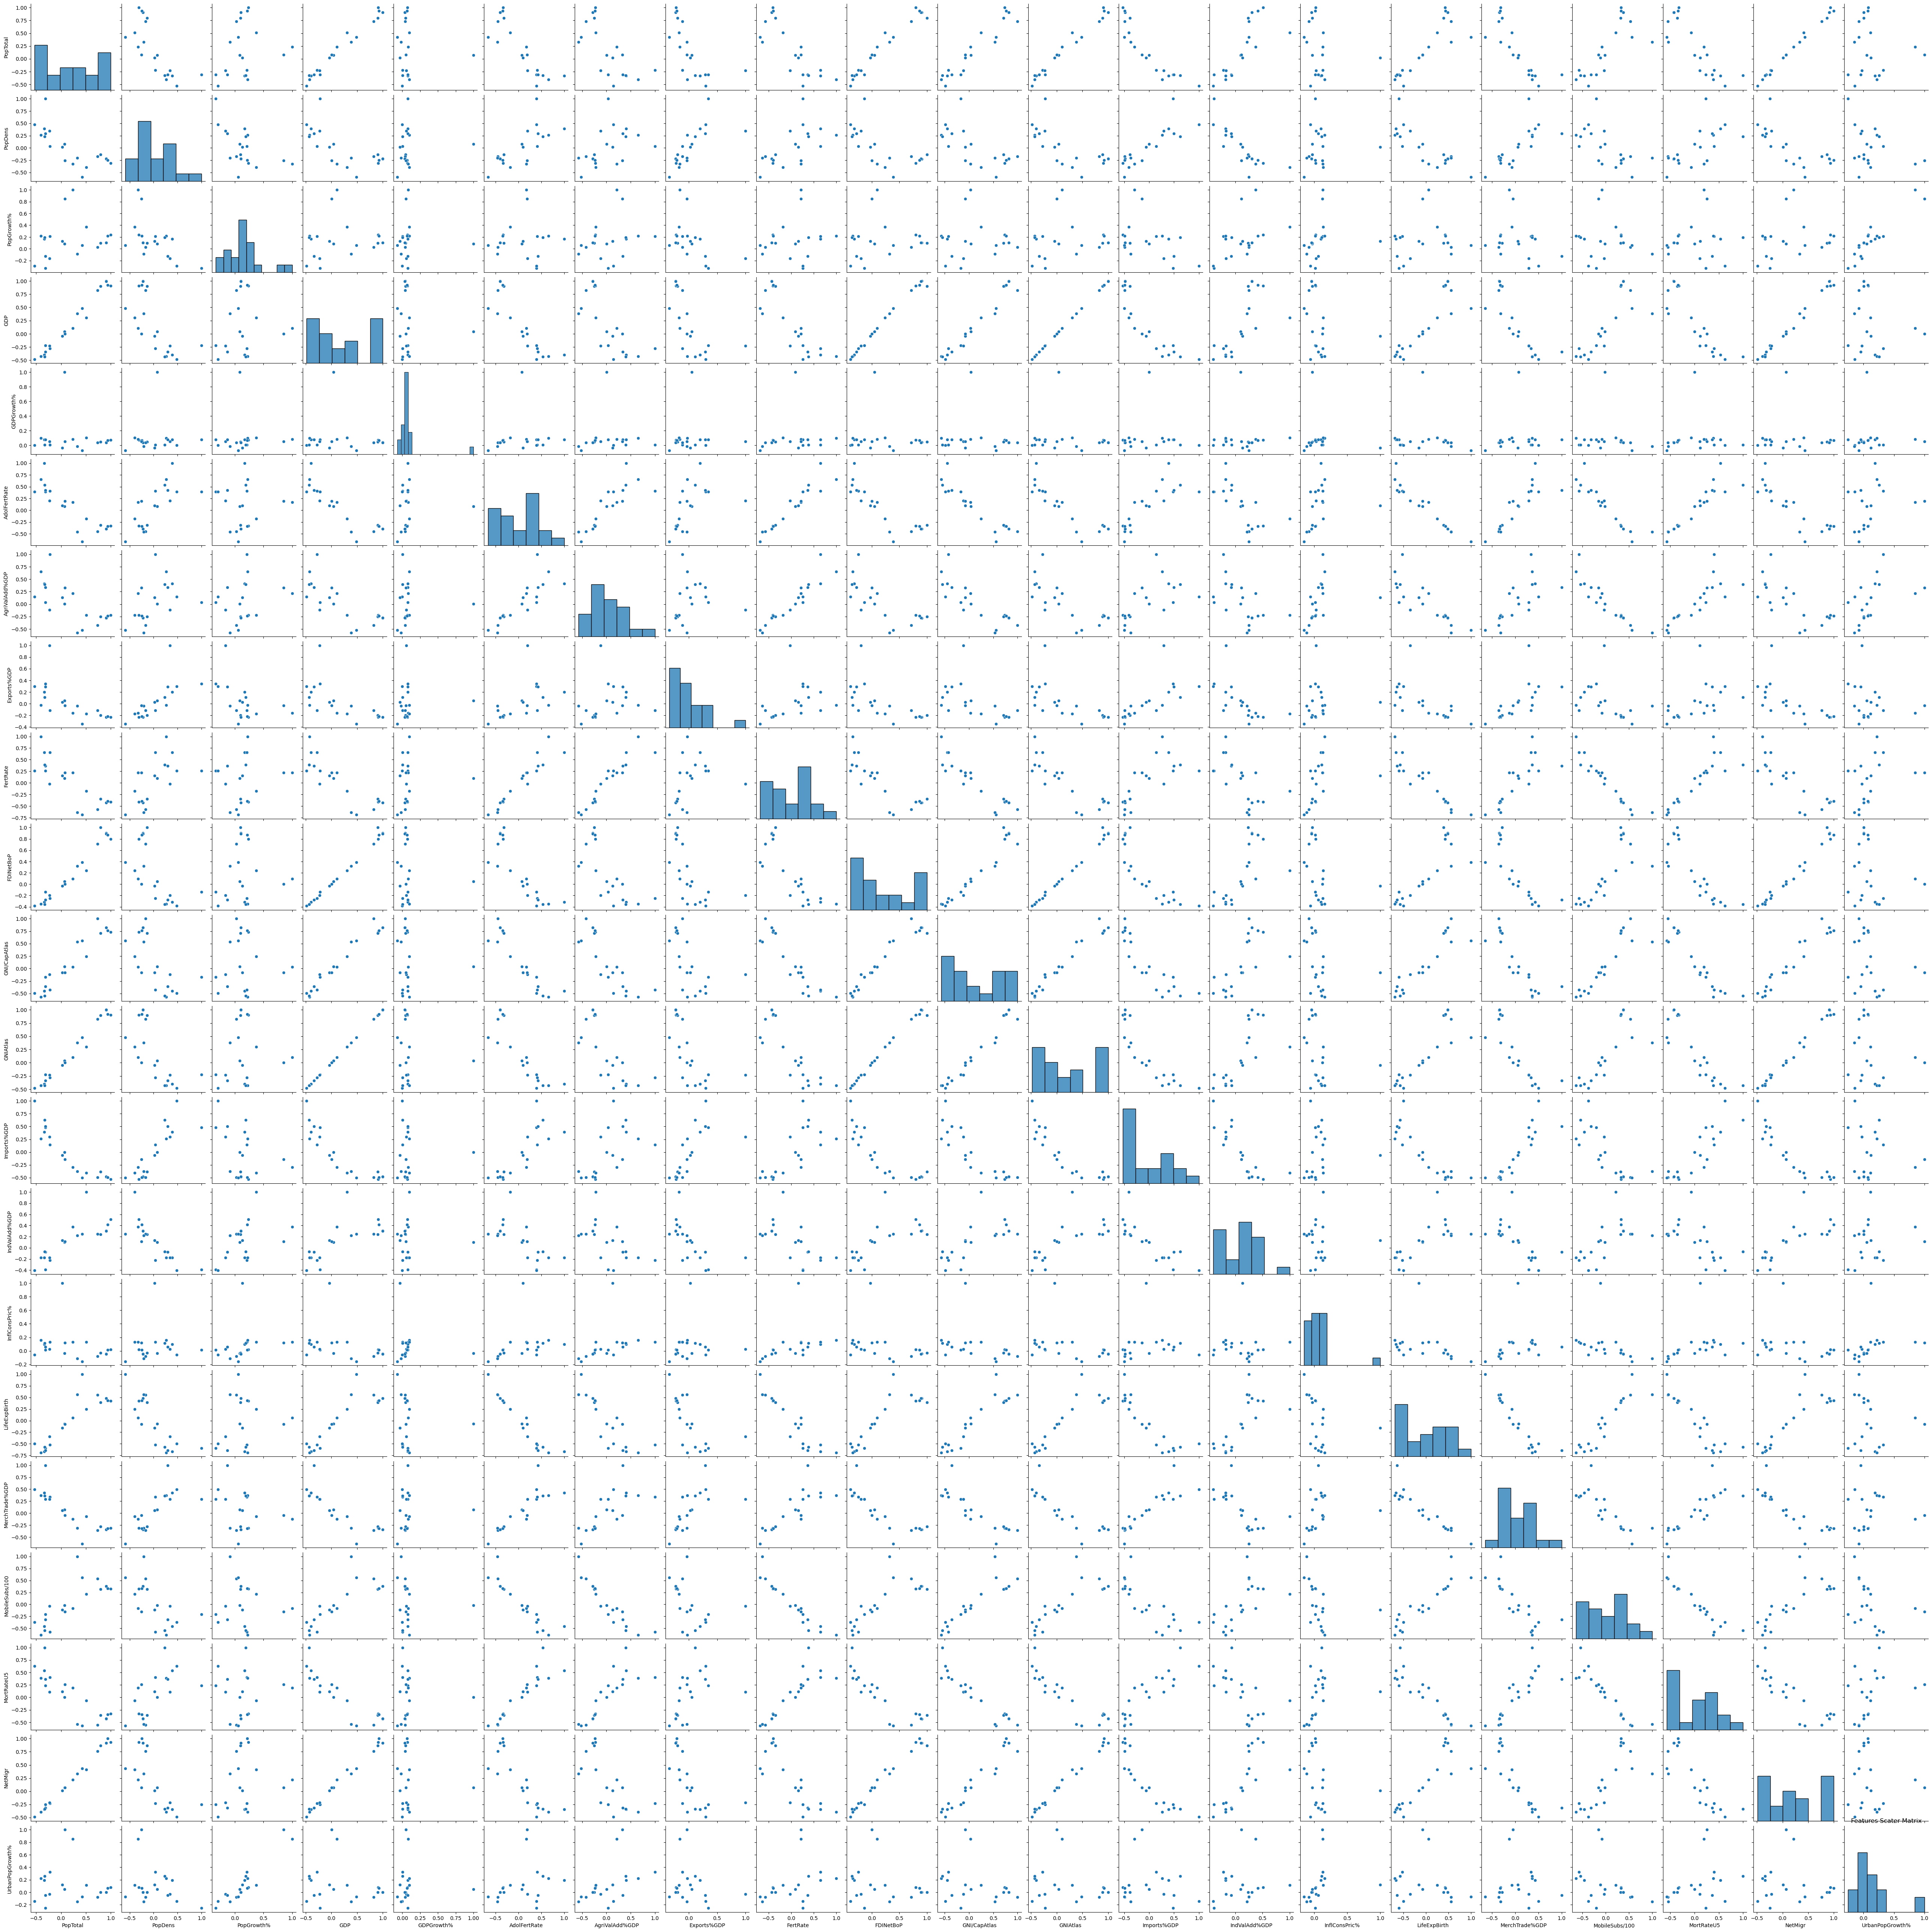

In [8]:
#Plot scatter matrix
sns.pairplot(Oceania_data_corr)
plt.title("Features Scater Matrix")
plt.savefig("Features_Scat.png", dpi = 300, bbox_inches = 'tight')
plt.show()

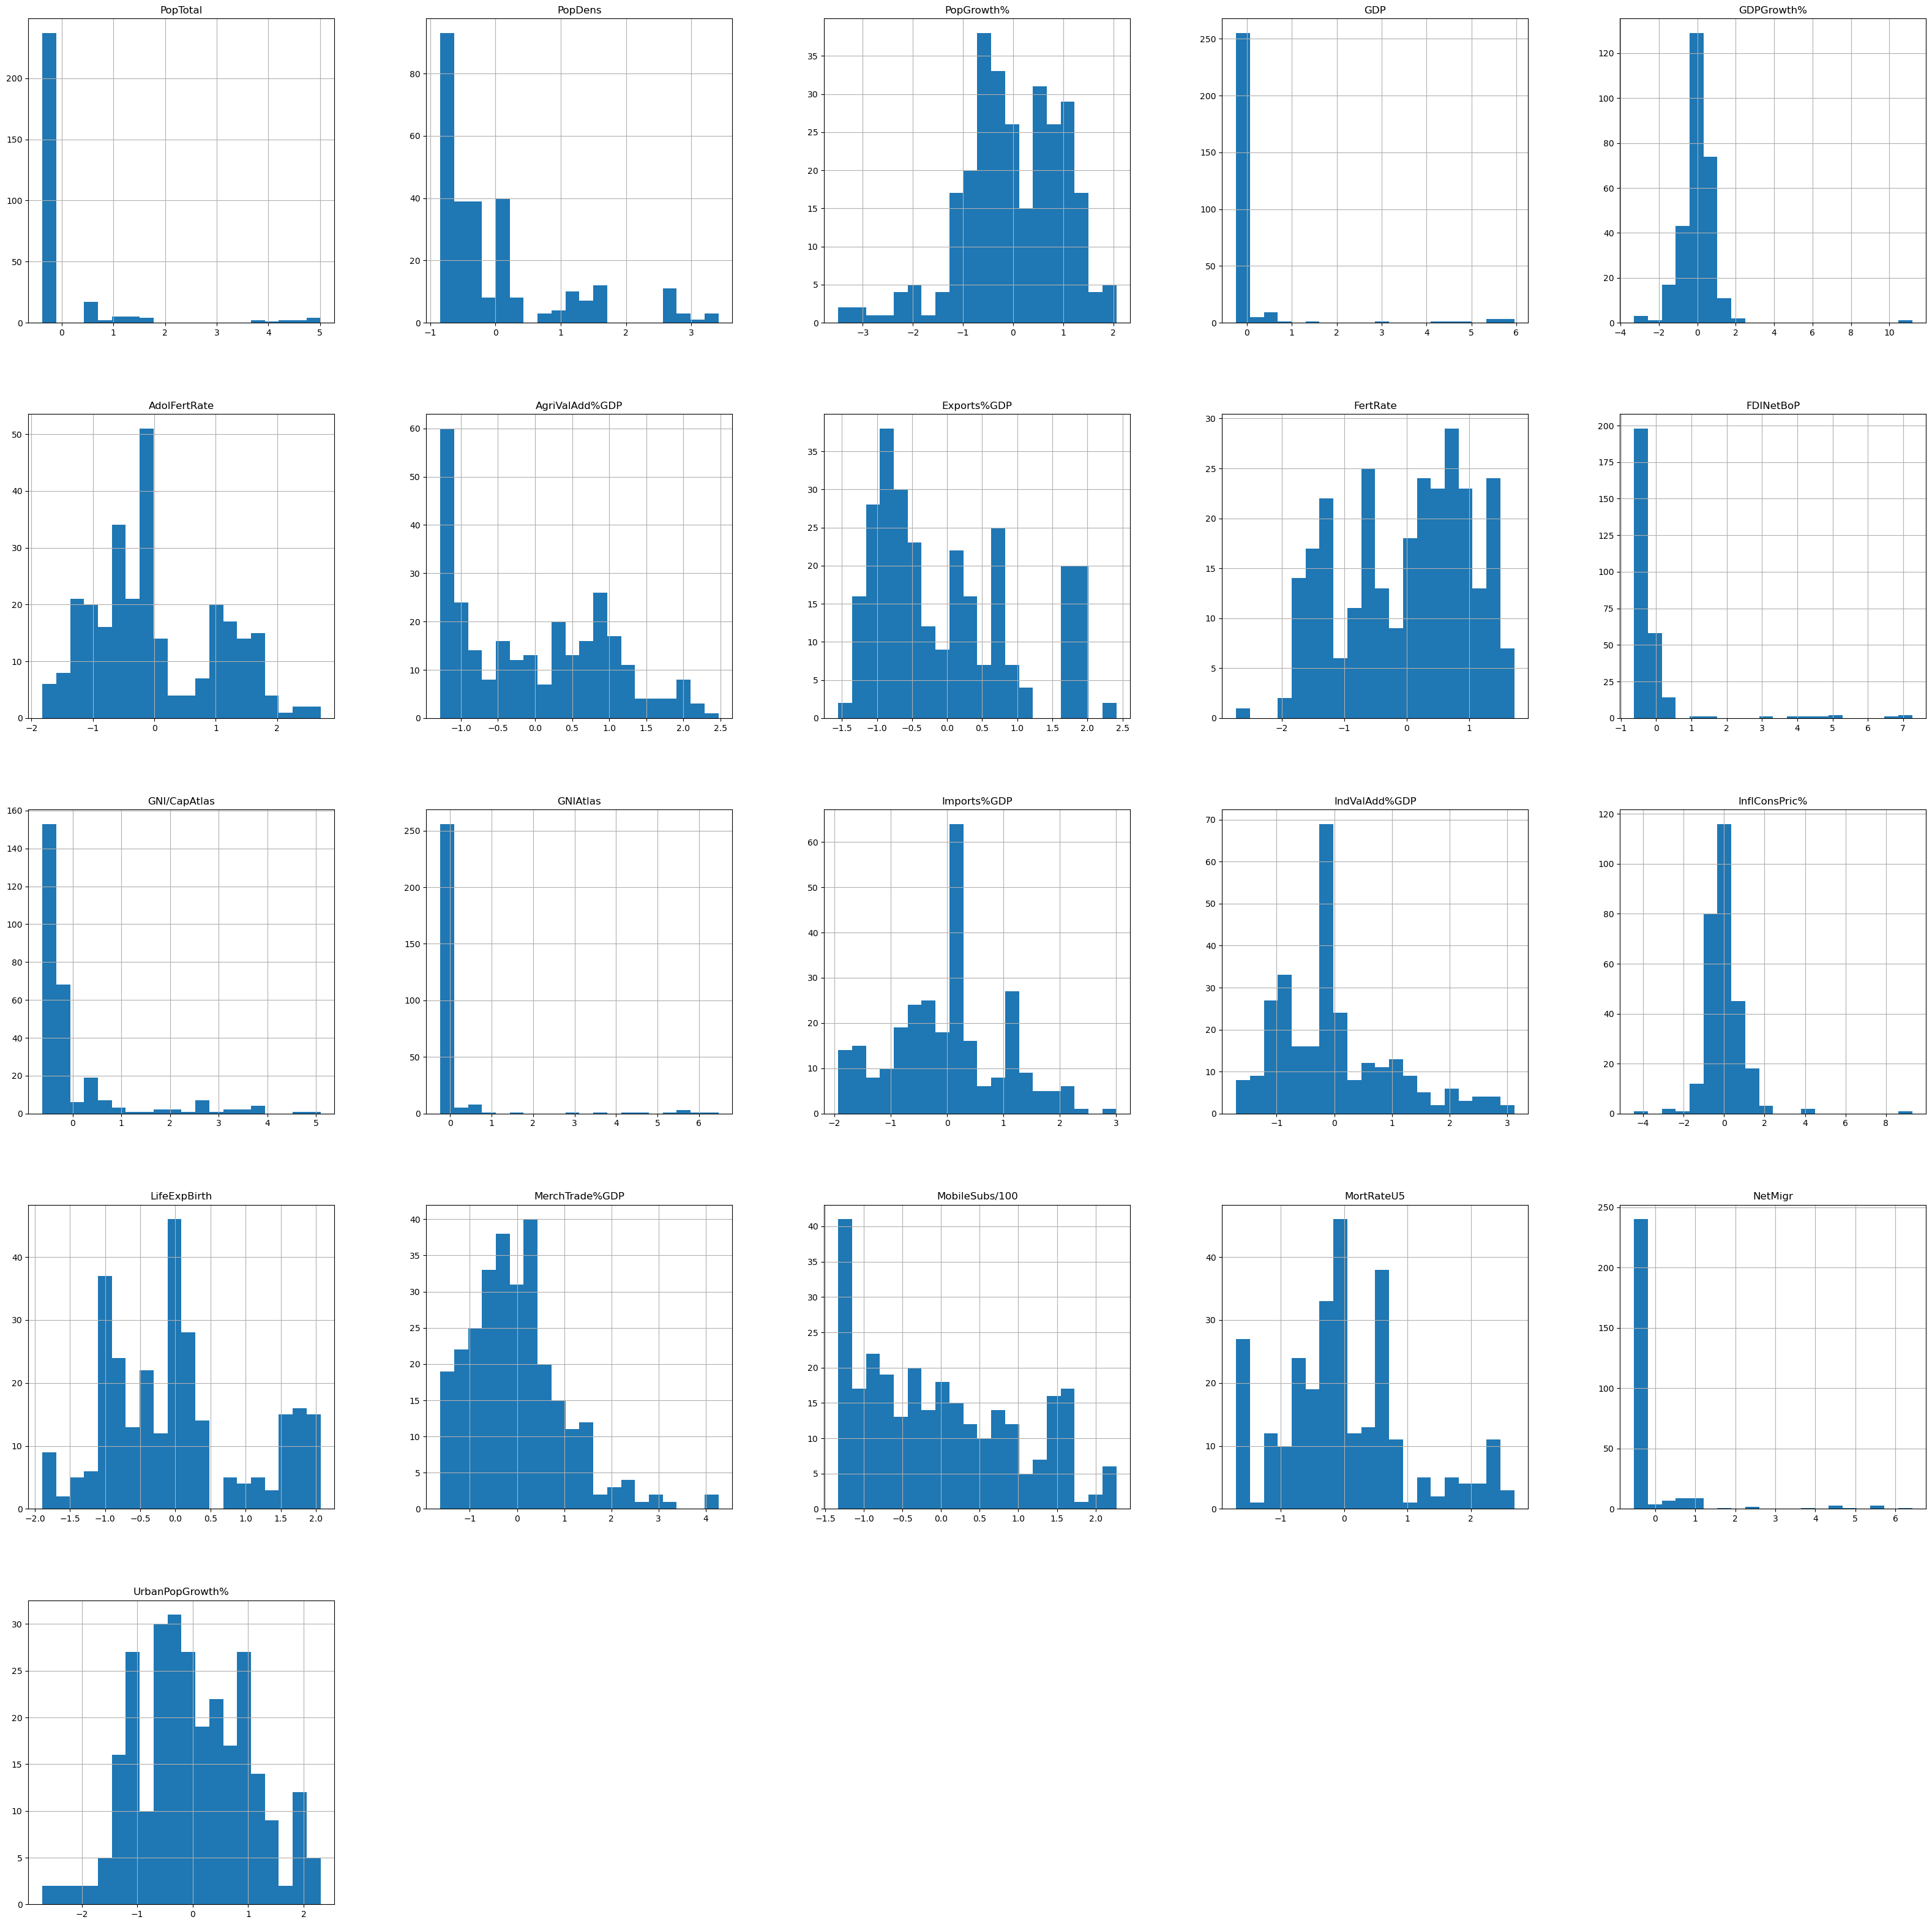

In [9]:
#Split data
train_set, test_set = train_test_split(Oceania_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)
test_set = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

#Normalize the features
scalered_train_set=scaler.fit_transform(train_set)
scalered_test_set=scaler.transform(test_set)

#Visualize the normalized features
train_set.hist(bins=20,figsize=(40,40))
plt.savefig("Normalized_Features.png")
plt.show()

In [10]:
# Split data into features and target
X_train = train_set.drop(columns=['PopGrowth%'])
y_train = train_set['PopGrowth%']
X_test = test_set.drop(columns=['PopGrowth%'])
y_test = test_set['PopGrowth%']

In [11]:
# Define and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    kFold = KFold(n_splits=10, shuffle=True, random_state=42)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kFold, scoring='r2', error_score='raise')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_absolute_error')
    print(f"{name}:")
    print("Cross-validation R^2 scores:", r2_scores)
    print("Mean R^2:", np.mean(r2_scores))
    print("Cross-validation MSE scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("Cross_validation MAE scores:", mae_scores)
    print("Mean MAE:", np.mean(mae_scores))
    print("\n")

Linear Regression:
Cross-validation R^2 scores: [0.74774119 0.85965275 0.67428912 0.87935896 0.85256917 0.77591974
 0.87063716 0.84688374 0.88147457 0.72526296]
Mean R^2: 0.8113789338840913
Cross-validation MSE scores: [0.19995147 0.18028401 0.1753449  0.14834836 0.14533374 0.20213195
 0.12249552 0.17202191 0.12759181 0.21501578]
Mean MSE: 0.16885194550050053
Cross_validation MAE scores: [0.34544147 0.35659607 0.28782635 0.31510593 0.32095796 0.37055621
 0.28185963 0.31168499 0.28297071 0.37200093]
Mean MAE: 0.32450002377727066


Support Vector Regression:
Cross-validation R^2 scores: [0.96391373 0.88668626 0.80861083 0.95107251 0.92820569 0.90406449
 0.94765836 0.92182315 0.94682865 0.82845347]
Mean R^2: 0.9087317147284167
Cross-validation MSE scores: [0.02860357 0.14555793 0.10303344 0.06016454 0.07077309 0.08653877
 0.04956305 0.08782955 0.05723859 0.13425642]
Mean MSE: 0.08235589452997812
Cross_validation MAE scores: [0.12761596 0.25982935 0.19737774 0.1767282  0.16623789 0.2202727

In [14]:
#Tese set performance
performance_results = {}
for name, model in models.items():
    # Fit the model to the entire training set
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print the R^2 score, MSE and MAE for the test set
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the performance metrics
    performance_results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae}

# Sort the models based on R^2 score
sorted_models = sorted(performance_results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)

print("Model Rankings based on R^2 Score:")
for idx, (model_name, metrics) in enumerate(sorted_models, start=1):
    print(f"{idx}. {model_name}: R^2 Score = {metrics['R2 Score']:.4f}, MSE = {metrics['MSE']:.4f}, MAE = {metrics['MAE']:.4f}")

Model Rankings based on R^2 Score:
1. XGBoost: R^2 Score = 0.9673, MSE = 0.0284, MAE = 0.1144
2. Random Forest Regressor: R^2 Score = 0.9615, MSE = 0.0335, MAE = 0.1236
3. Support Vector Regression: R^2 Score = 0.8872, MSE = 0.0981, MAE = 0.1852
4. Linear Regression: R^2 Score = 0.8158, MSE = 0.1602, MAE = 0.3168


Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.634235
4      AdolFertRate    0.133194
14     LifeExpBirth    0.074582
6       Exports%GDP    0.044436
0          PopTotal    0.032295
17       MortRateU5    0.022352
1           PopDens    0.015749
12    IndValAdd%GDP    0.008052
18          NetMigr    0.007222
10         GNIAtlas    0.006575
7          FertRate    0.005454
11      Imports%GDP    0.003828
8         FDINetBoP    0.002752
5    AgriValAdd%GDP    0.002711
2               GDP    0.002340
16   MobileSubs/100    0.002241
9      GNI/CapAtlas    0.000917
3        GDPGrowth%    0.000464
15   MerchTrade%GDP    0.000373
13    InflConsPric%    0.000225


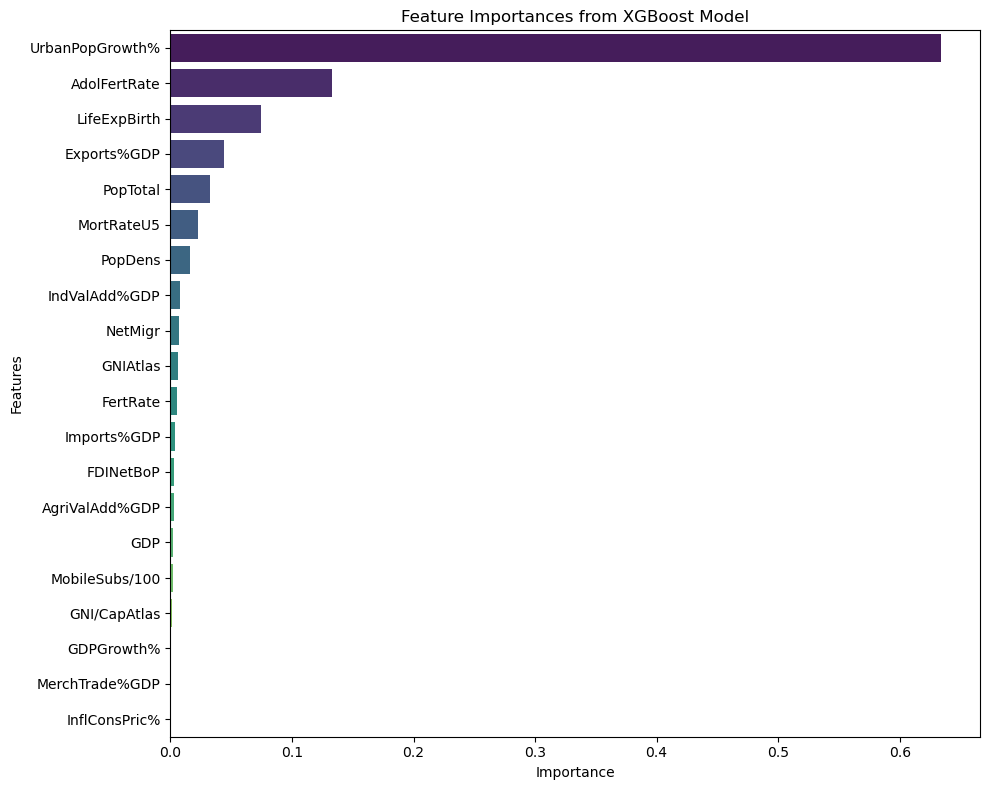

In [15]:
# Fit the model to the entire training set
best_model = models[sorted_models[0][0]]  # Select the best performing model
best_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Feature Importances from XGBoost Model.png")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}
Best cross-validation score (MSE):  0.032541370308250224


In [17]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2 Score: ", r2)

Test MSE:  0.026962154593186217
Test R^2 Score:  0.9690114229967076


In [18]:
# Extract feature importancesi
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.546344
4      AdolFertRate    0.072992
14     LifeExpBirth    0.056576
1           PopDens    0.053615
18          NetMigr    0.049848
17       MortRateU5    0.040338
0          PopTotal    0.039490
10         GNIAtlas    0.031828
7          FertRate    0.021022
6       Exports%GDP    0.020995
11      Imports%GDP    0.016289
5    AgriValAdd%GDP    0.011708
2               GDP    0.009830
16   MobileSubs/100    0.007661
12    IndValAdd%GDP    0.006039
9      GNI/CapAtlas    0.004720
8         FDINetBoP    0.004195
13    InflConsPric%    0.002673
15   MerchTrade%GDP    0.002092
3        GDPGrowth%    0.001744


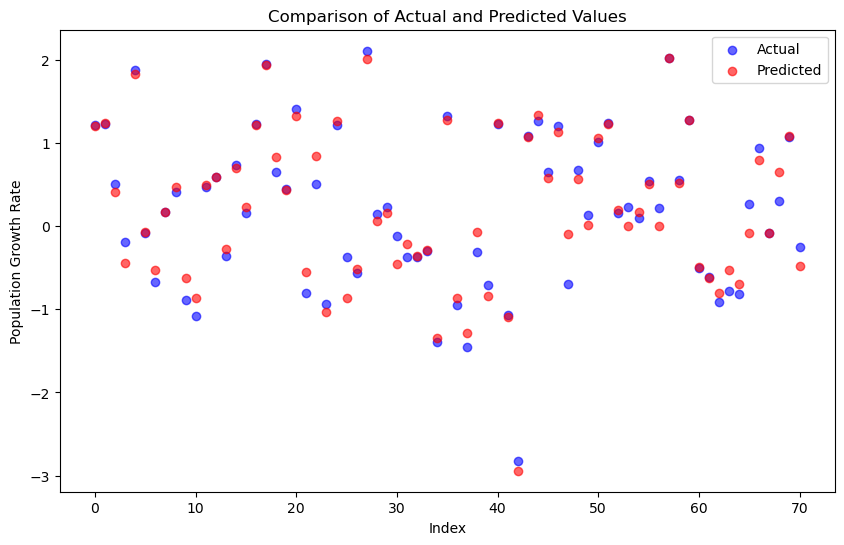

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the test set with the optimized model
y_pred_optimized = best_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(np.arange(len(y_pred_optimized)), y_pred_optimized, color='red', label='Predicted', alpha=0.6)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Population Growth Rate')
plt.legend()
plt.savefig("Comparison_of_Actual_and_Predicted_Values.png")
plt.show()

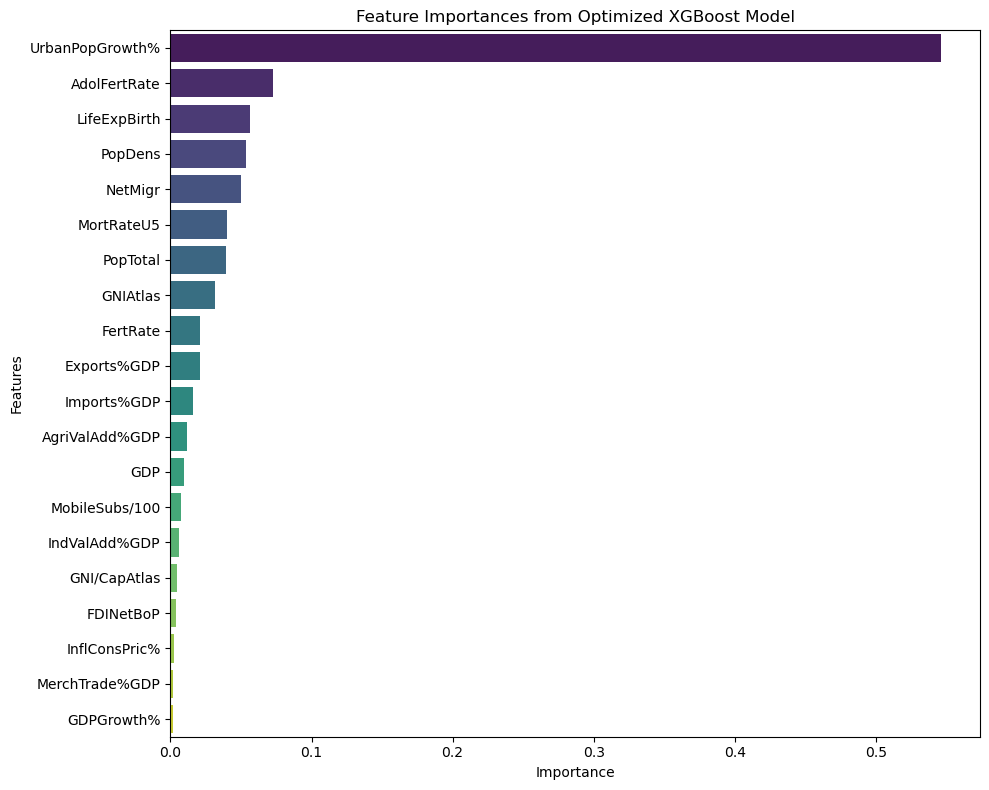

In [20]:
# Assuming 'importance_df' is already defined and sorted as you described
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from Optimized XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Optimized_Feature_Importances.png")
plt.show()